## Figure 1
### Example of topic selection from the most probable topics of one poem

In [13]:
library(tidyverse)

# network graphics
library(igraph)
library(ggraph)

# basic colouring and layout options
library(wesanderson)
library(patchwork)
library(ggplotify) # for as.ggplot() 
theme_set(theme_minimal())

In [2]:
# load model output
load("../data/lda75_output.Rda")

# load code for edges calculation
source("03_fn_calculate_edges.R")

# function to extract topic lables:
get_topic_labels = function(x, n_labels = 10) {
  
  #takes beta-matrix as an input
  top_terms = x %>%
    group_by(topic) %>%
    top_n(20, beta) %>%
    ungroup() %>%
    arrange(topic, -beta)
  
  topic_labels = top_terms %>%
    group_by(topic) %>%
    top_n(n_labels, beta) %>%
    summarise(label=paste(term, collapse=" ")) %>%
    mutate(label = paste(topic, label, sep="_"))
  
  return(topic_labels)
}

In [3]:
# prepare gamma data
gamma <- gamma %>% 
    # select ONLY RNC connections & topics
    filter(corpus == "N") %>% 
    # add index for create_edges function
    mutate(index = paste0(corpus, "_", id)) %>% 
    # fix typo
    rename(author = first_line)
glimpse(gamma)

# extract labels
topic_labels <- get_topic_labels(beta, n_labels = 5)
head(topic_labels)

Rows: 969,525
Columns: 8
$ corpus  <chr> "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "N…
$ id      <chr> "1-1", "1-2", "1-3", "10-1", "10-2", "100-1", "100-2", "100-3"…
$ year    <chr> "1785", "1785", "1785", "1803", "1803", "1810", "1810", "1810"…
$ author  <chr> "ССБобров", "ССБобров", "ССБобров", "ССБобров", "ССБобров", "А…
$ formula <chr> "iamb_4", "iamb_4", "iamb_4", "iamb_4", "iamb_4", "iamb_6", "i…
$ topic   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ gamma   <dbl> 0.019108280, 0.006211180, 0.006451613, 0.006211180, 0.00763358…
$ index   <chr> "N_1-1", "N_1-2", "N_1-3", "N_10-1", "N_10-2", "N_100-1", "N_1…


topic,label
<int>,<chr>
1,1_старик девица красный молодой старый
2,2_брат два жена муж другой
3,3_искать исчезать везде дух след
4,4_дева прекрасный краса чистый молодой
5,5_бог давать сила боже господь
6,6_слава великий герой отечество россия


Compute edges

In [4]:
edges_raw <- compute_edges(gamma,
                           gamma_thresh = 0.05,
                           time_slice = 5)

glimpse(edges_raw)

Rows: 80,413
Columns: 14
Groups: index, edge_id [80,413]
$ corpus  <chr> "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "N…
$ id      <chr> "10256", "10296-1", "10296-1", "10296-1", "10296-1", "10302", …
$ year    <chr> "1814", "1848", "1848", "1848", "1848", "1850", "1850", "1850"…
$ author  <chr> "АННахимов", "НАНекрасов", "НАНекрасов", "НАНекрасов", "НАНекр…
$ formula <chr> "iamb_free", "anapaest_регулярная:3+2#3", "anapaest_регулярная…
$ topic   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ gamma   <dbl> 0.06569343, 0.13548387, 0.13548387, 0.13548387, 0.13548387, 0.…
$ index   <chr> "N_10256", "N_10296-1", "N_10296-1", "N_10296-1", "N_10296-1",…
$ from    <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ to      <int> 46, 15, 57, 58, 59, 3, 25, 41, 56, 59, 38, 42, 53, 61, 21, 23,…
$ slice   <dbl> 1810, 1845, 1845, 1845, 1845, 1850, 1850, 1850, 1850, 1850, 18…
$ edge_id <chr> "1 46", "1 15", "1 57", "1 58", "1 59", "1 3", 

### Fig. 1
Very simple most probable topic extraction and network creation from one poem by Nadezhda Teplova

In [5]:
gamma %>% 
    filter(formula == "iamb_6" & author == "НСТеплова") %>% head()

corpus,id,year,author,formula,topic,gamma,index
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>
N,1056,1838,НСТеплова,iamb_6,1,0.021582734,N_1056
N,1056,1838,НСТеплова,iamb_6,2,0.007194245,N_1056
N,1056,1838,НСТеплова,iamb_6,3,0.007194245,N_1056
N,1056,1838,НСТеплова,iamb_6,4,0.007194245,N_1056
N,1056,1838,НСТеплова,iamb_6,5,0.007194245,N_1056
N,1056,1838,НСТеплова,iamb_6,6,0.007194245,N_1056


In [6]:
# extract and translate topic labels for Fig. 1
demo_labels <- gamma %>% 
    filter(id == 1056 & gamma > 0.05) %>% 
    left_join(topic_labels, by = "topic") %>% 
    cbind(eng_label = c("23 white-breast-black-face-curls",
                       "53 dream-to sleep-night-to wake up-silence",
                       "74 beam-sun-sky-dawn-shine"))

demo_labels

corpus,id,year,author,formula,topic,gamma,index,label,eng_label
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>
N,1056,1838,НСТеплова,iamb_6,23,0.05035971,N_1056,23_белый грудь черный лицо кудри,23 white-breast-black-face-curls
N,1056,1838,НСТеплова,iamb_6,53,0.06474820,N_1056,53_сон спать ночь просыпаться тишина,53 dream-to sleep-night-to wake up-silence
N,1056,1838,НСТеплова,iamb_6,74,0.10791367,N_1056,74_луч солнце небо заря блистать,74 beam-sun-sky-dawn-shine


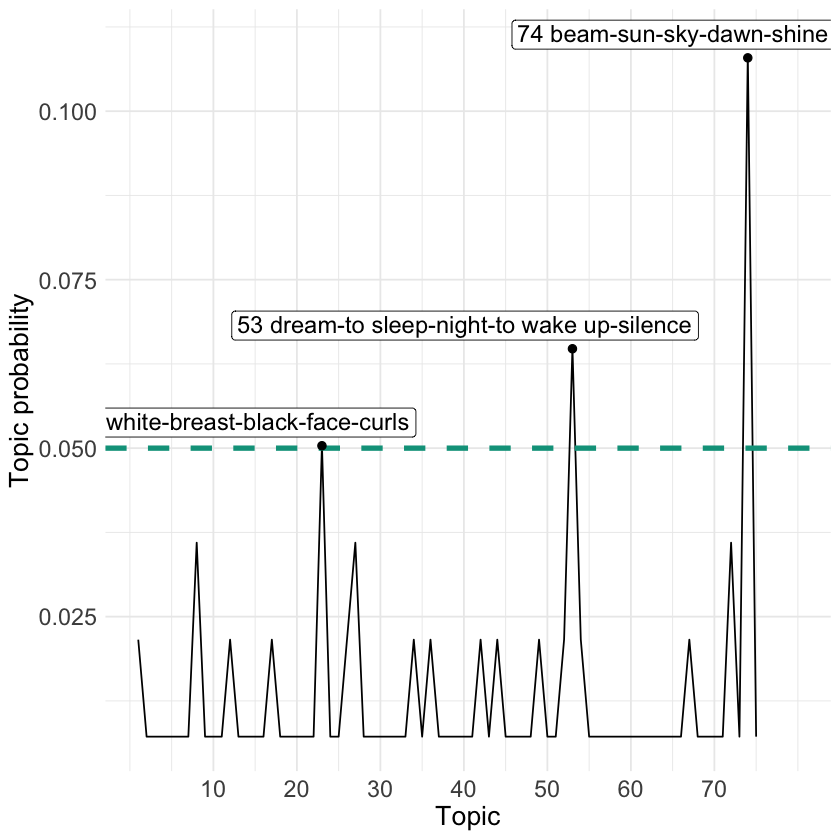

In [10]:
# Plot with y axis for topic prob: to show the cut off and label 3 the most probable topics

demo_lineplot <- gamma %>% 
    filter(id == 1056) %>% 
    ungroup() %>% 
    ggplot(aes(x = topic, y = gamma)) + 
        geom_line() + 
        
        # threshold line
        geom_hline(yintercept = 0.05, 
                   linetype = 2,
                   linewidth = 1.5,
                   colour = wes_palette("Darjeeling1")[2]) + 
        
        geom_point(data = gamma %>% filter(id == 1056 & gamma > 0.05), 
                   size = 2) + 
        geom_label(data = demo_labels,
                   aes(label = eng_label), 
                   vjust = -0.3, hjust = 0.73,
                  size = 5) + 
        labs(x = "Topic", y = "Topic probability") + 
        expand_limits(x = 80, y = 0.11) + 
        scale_x_continuous(breaks = seq(10, 70, 10)) +
        scale_y_continuous(breaks = seq(0, 0.1, 0.025)) + 
        theme(axis.text = element_text(size = 14),
             axis.title = element_text(size = 16))

demo_lineplot

Warning message:
“Using the `size` aesthetic in this geom was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` in the `default_aes` field and elsewhere instead.”


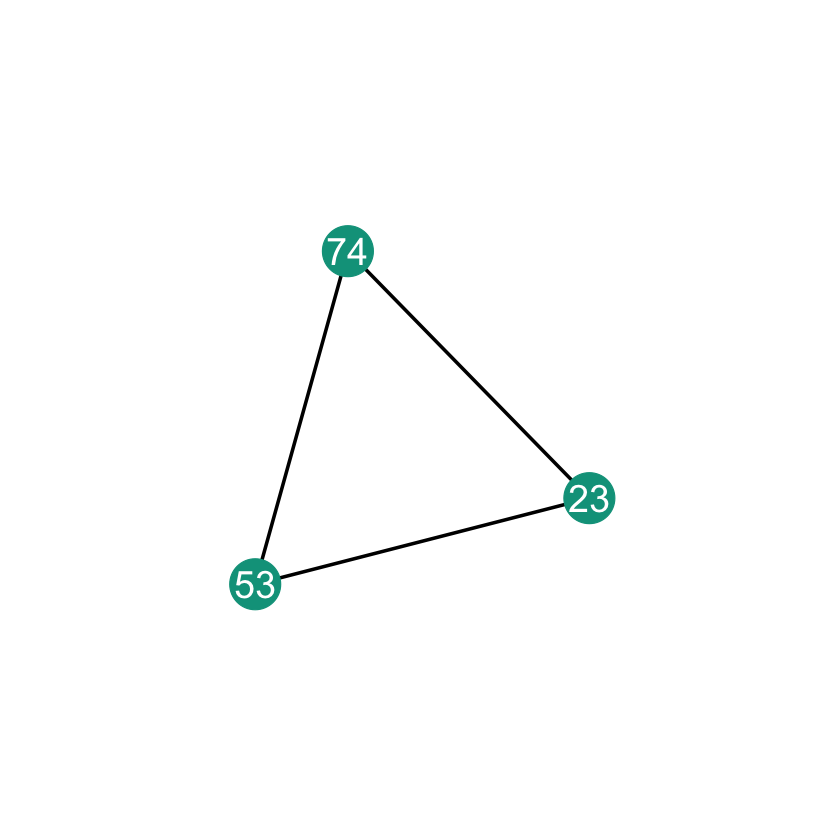

In [11]:
demo_edges <- edges_raw %>% ungroup() %>% filter(id %in% c(1056)) %>% select(source, target) 

demo_nodes <- tibble(source = unique(c(demo_edges$source, demo_edges$target)),
                     idn = str_extract(source, "^\\d+"))

demo_net <- graph_from_data_frame(demo_edges, demo_nodes, directed = F)

demo_graph <- ggraph(demo_net, "stress") + 
    geom_edge_fan(width = 1) + 
    geom_node_point(colour = wes_palette("Darjeeling1")[2], size = 14) + 
    geom_node_text(aes(label = idn), size = 8, colour = "white") + 
    scale_x_continuous(expand = c(0,0.7)) + 
    scale_y_continuous(expand = c(0, 0.7))

demo_graph

In [14]:
# layout for the two plots w/ patchwork package
demo_layout <- "
AAAAAAAA#BBB
AAAAAAAA#BBB
"

# combine two plots
demo_plots <- demo_lineplot + as.ggplot(demo_graph) + plot_layout(design = demo_layout)

# save
ggsave("../plots/Fig_1.png", plot = demo_plots, dpi = 300,
      height = 8, width = 14, bg = "white")